In [1]:
# import geopandas
# import geoplot

In [2]:
# myCountry = "Romania"
# world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
# thisCountry = world.query('name == "{}"'.format(myCountry))
# ax = geoplot.polyplot(
#     thisCountry, 
#     edgecolor='None', figsize=(7, 8)
# )
# geoplot.polyplot(thisCountry, edgecolor='gray', ax=ax)
#plt.show()

In [3]:
import pandas as pd
import numpy as np
import geopandas as gpd
%matplotlib inline 
import matplotlib.pyplot as plt

In [4]:
fp = "ROU_adm/ROU_adm1.shp"
map_df = gpd.read_file(fp)
# check the GeoDataframe
#map_df.head()

In [5]:
plt.rcParams['figure.figsize'] = [50, 70] #height, width
#map_df.plot()

In [6]:
judete = pd.read_csv("ROU_adm/ROU_judete.csv", sep=";")
judete.head()

,province,area_km2,population_2007,municipalities,cities,comunes,villages
0,Bacău,6621,719844,3,5,85,491
1,Botoșani,4986,454167,2,5,71,333
2,Iași,5476,825100,2,3,93,418
3,Neamț,5896,566059,2,3,78,344
4,Suceava,8553,705878,5,11,98,379


In [7]:
#idx1 = map_df[['NAME_1']].to_numpy()
#idx2 = judete[['province']].to_numpy()

In [8]:
# join the geodataframe with the csv dataframe
merged = map_df.merge(judete, how='left', left_on="NAME_1", right_on="province")
#merged = merged[['NAME_1', 'province', 'geometry', 'population_2007', 'area_km2', 'municipalities', 'cities', 'comunes', 'villages']]
#merged.head()

<Axes: title={'center': 'Populatia Romaniei'}>

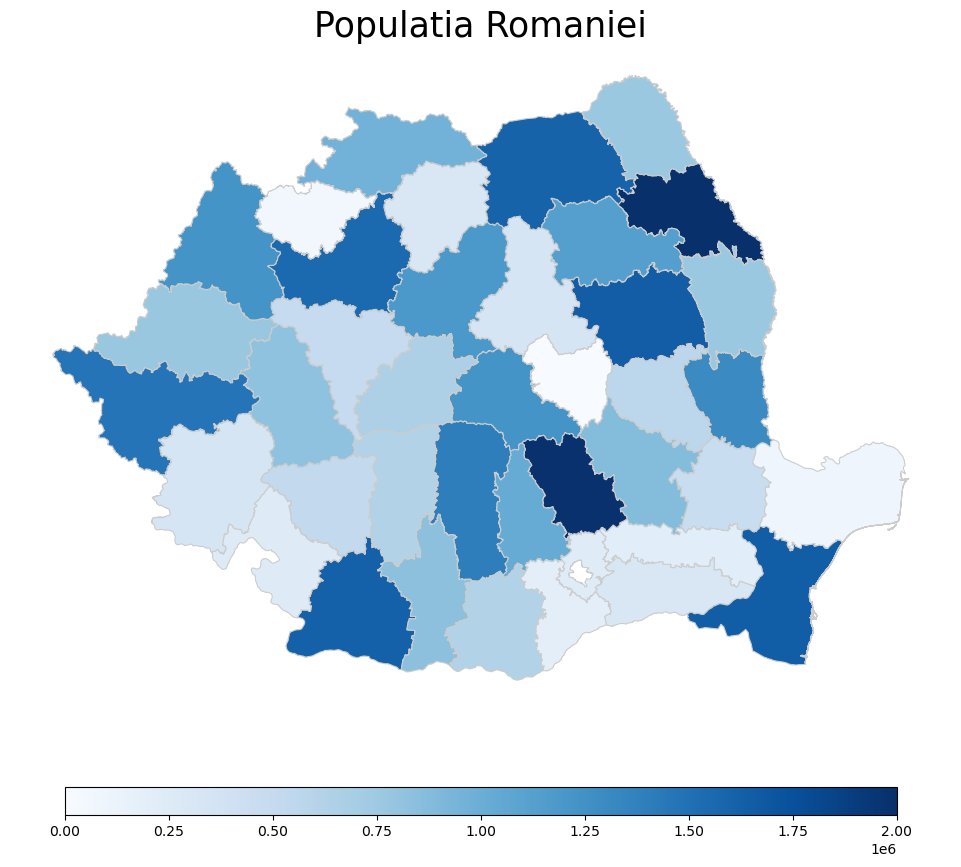

In [9]:

variable = 'population_2007'
vmin, vmax = 100000, 2000000
fig, ax = plt.subplots(1, figsize=(30, 10))
ax.axis('off')
ax.set_title('Populatia Romaniei', fontdict={'fontsize': '25', 'fontweight' : '3'})

sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=vmax))# empty array for the data range
sm.set_array([]) 
#fig.colorbar(sm)
fig.colorbar(sm, orientation="horizontal", fraction=0.036, pad=0.1, aspect = 30,ax=plt.gca())

merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

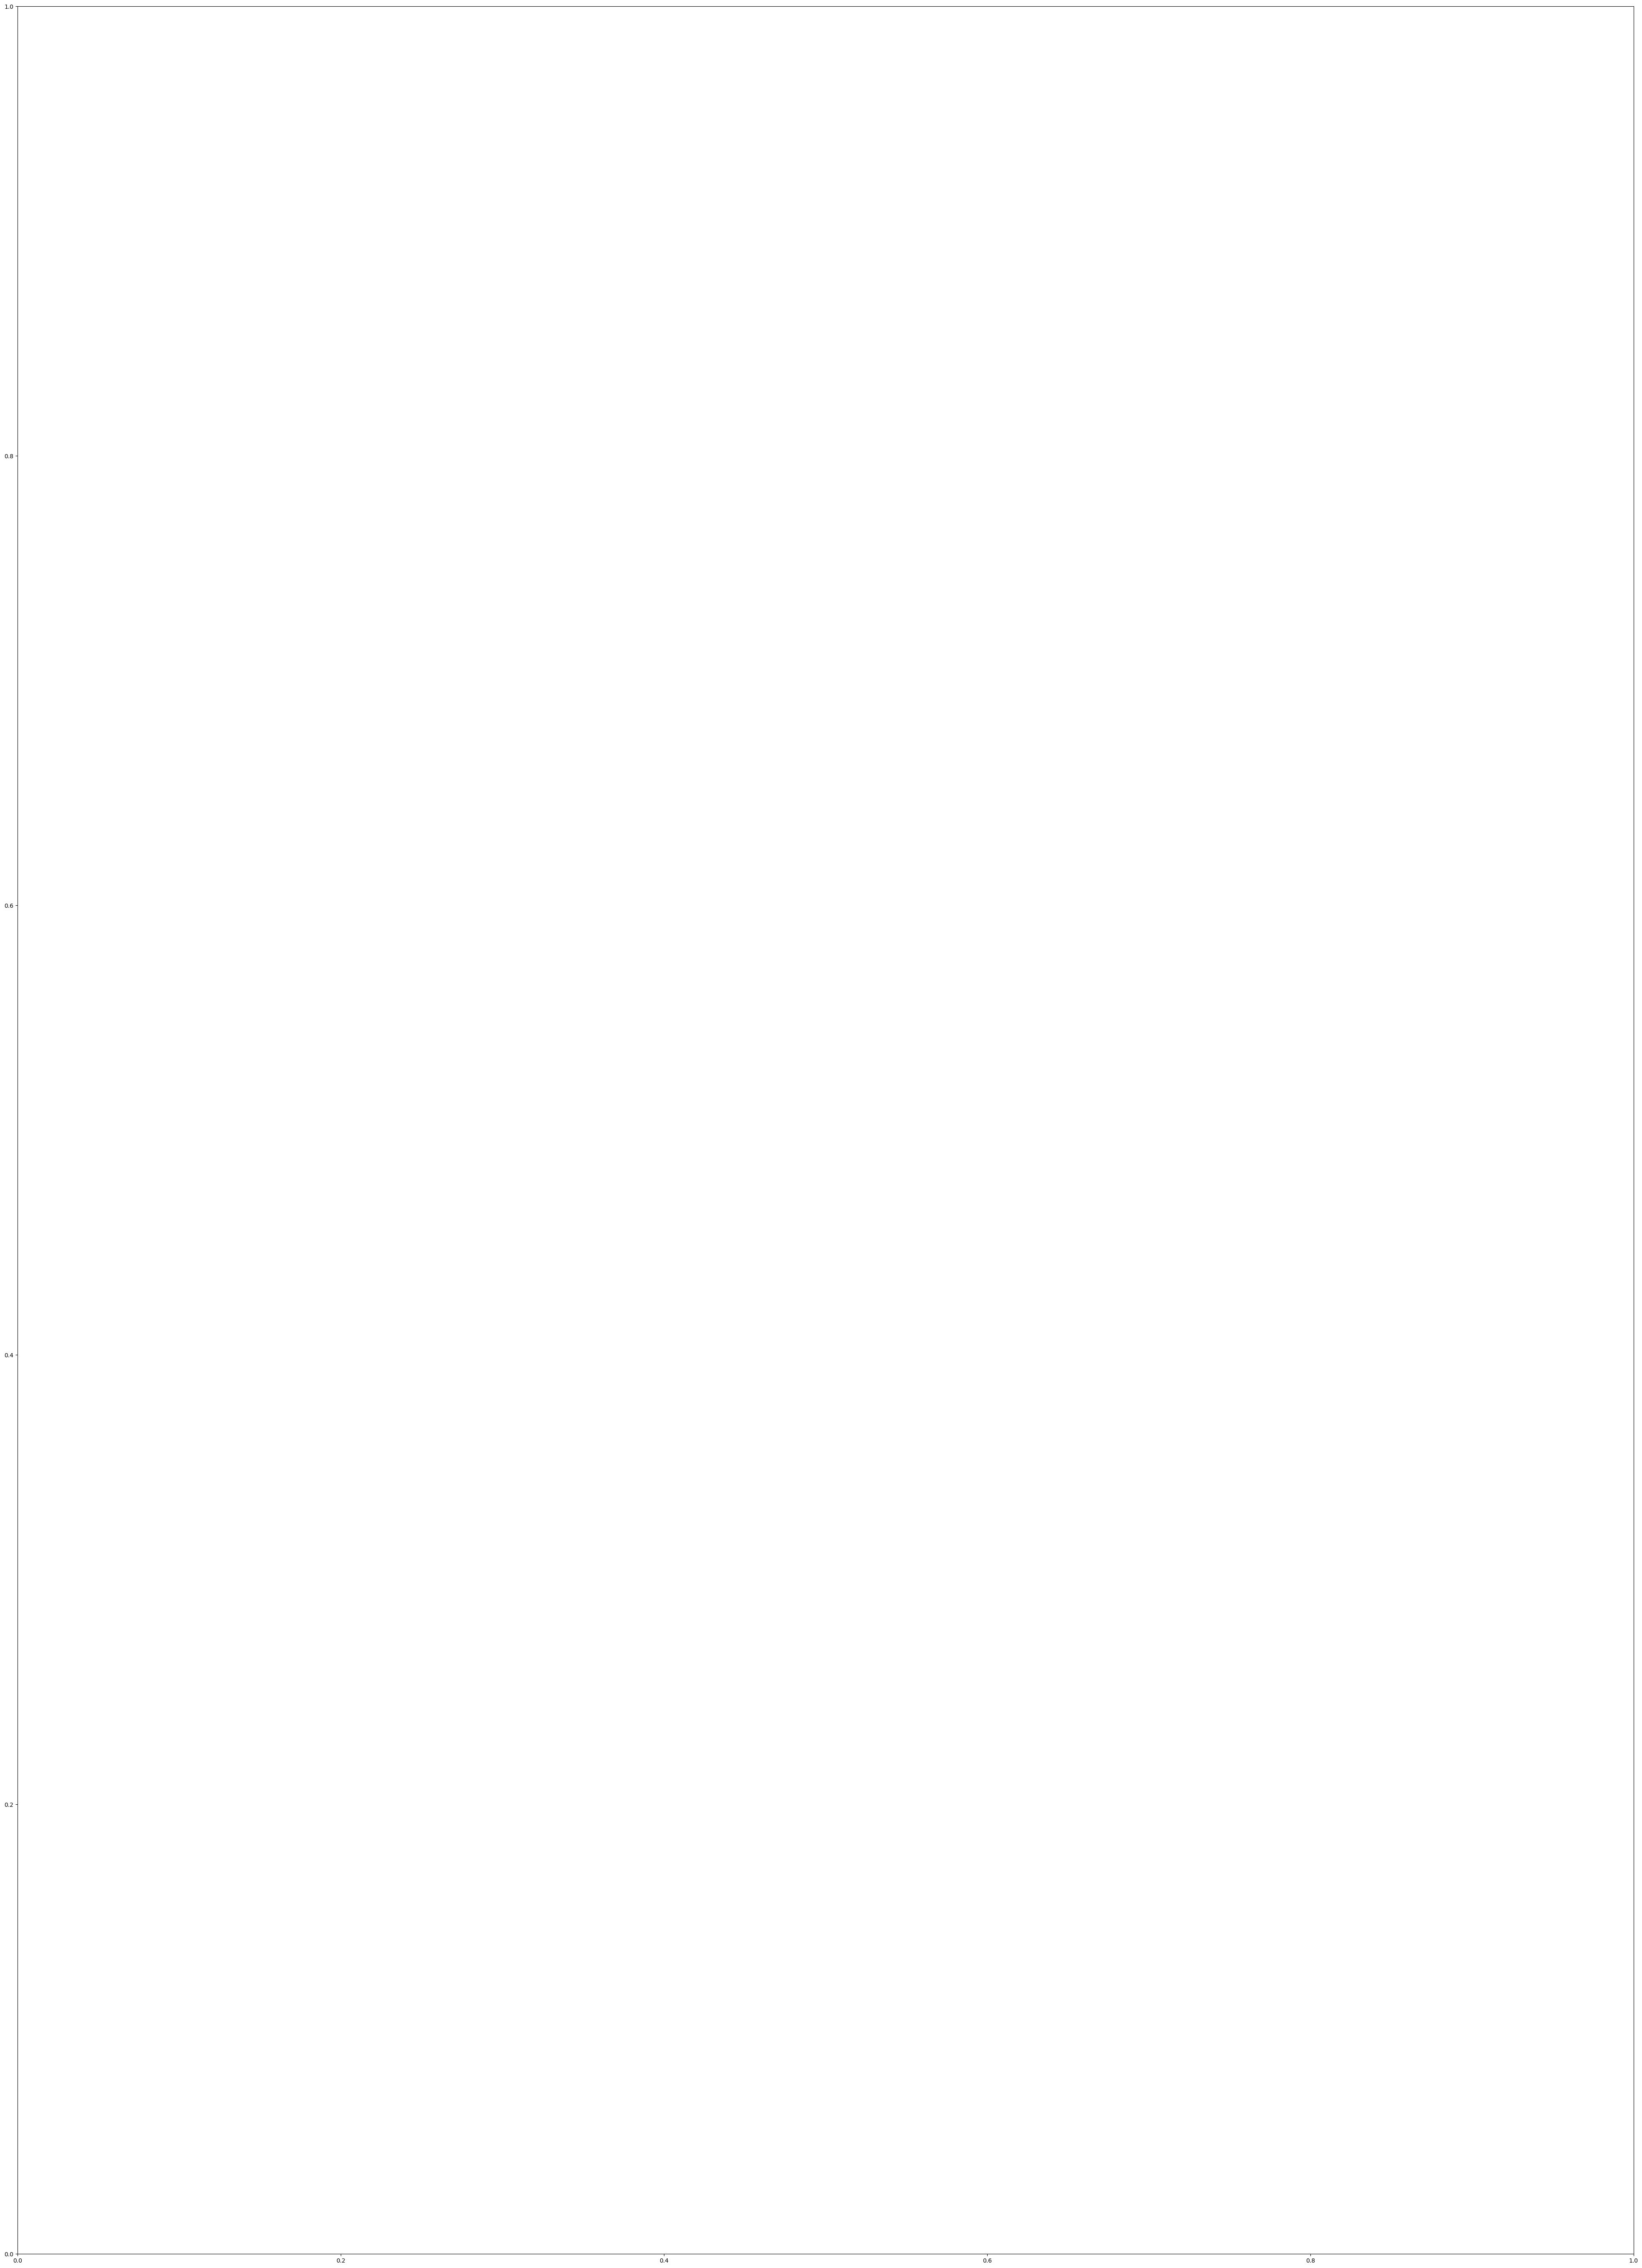

In [10]:
merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[:])
merged['coords'] = [coords[0] for coords in merged['coords']]

for idx, row in merged.iterrows():
    plt.annotate(text=row['province'], xy=row['coords'], horizontalalignment='center')